# Predicción de tarifas de taxis

In [1]:
# Importando librerías
import pandas as pd
import numpy as np
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoramos los futuros warnings
warnings.filterwarnings("ignore")

In [5]:
# Cargando datos

'''
    Aquí cada uno escribira su propia ruta para no subir el archivo dado que es demasiado pasado
'''

# Ruta de Danilo
#nombre_archivo ='../../PracticaCalificada2-CC421/train.csv'

# Ruta de Victor
#nombre_archivo ='D:/Nueva carpeta (4)/UNI-21-I/IA/PracticaCalificada2-CC421/PracticaCalificada2-CC421/train.csv'

# Ruta de William
nombre_archivo ='../train.csv'

# Ruta de Bryan
#nombre_archivo ='../train.csv'


# Cargando los datos
# Estoy usando una menor cantidad de data ya que mi hardware no soporta los 55 millones de datos y demora mucho varias veces 
# Si se desea trabajar con toda la data completa borrar nrows = 1000000  un millon de datos
df = pd.read_csv(nombre_archivo,nrows=100010)



## 1. Análisis de Datos

In [6]:
# Visualización de los 30 primeros datos
df.head(30)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [7]:
# Cantidad de instancias y atributos (filas x columndas)

print("Cantidad de Instancias: "+str(df.shape[0]))
print("Cantidad de Atributos: "+str(df.shape[1]))

Cantidad de Instancias: 100010
Cantidad de Atributos: 8


In [8]:
# Visualización de los tipos de datos del dataframe
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
# Descripción actual de algunas mediciones 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100010.000000,100010.000000,100010.000000,100010.000000,100010.000000,100010.000000
mean,11.354627,-72.494827,39.914565,-72.491114,39.919136,1.673833
std,9.716604,10.693409,6.225380,10.470873,6.213122,1.300158
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992040,40.734998,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966980,40.767258,-73.963433,40.768165,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [10]:
# Verificando la correlación de las caracteristicas

'''
    Nota: Necesitan ser trabajadas dando que hay mucha dependencia entre características y poca correlación
        con la característica a predecir.
'''

df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008975,-0.008952,0.006322,-0.005588,0.015797
pickup_longitude,0.008975,1.000000,-0.946674,0.937559,-0.911017,-0.001343
pickup_latitude,-0.008952,-0.946674,1.000000,-0.926535,0.930183,-0.000918
dropoff_longitude,0.006322,0.937559,-0.926535,1.000000,-0.963605,-0.000381
dropoff_latitude,-0.005588,-0.911017,0.930183,-0.963605,1.000000,-0.002171
passenger_count,0.015797,-0.001343,-0.000918,-0.000381,-0.002171,1.000000


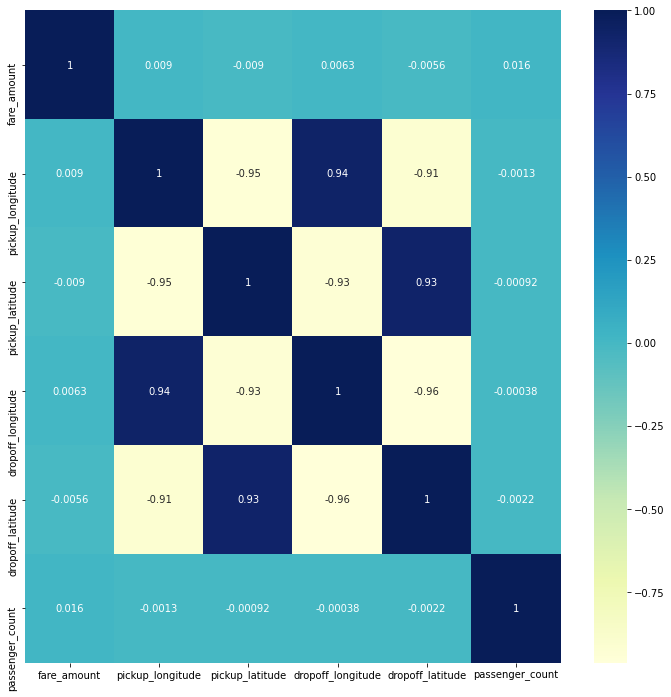

In [11]:
plt.figure(figsize=(12,12))

correlacion = df.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

In [12]:
# Verificando la cantidad de datos corrompidos o nulos

df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.sort_values('pickup_datetime')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
82469,2009-01-01 00:41:00.0000003,6.20,2009-01-01 00:41:00 UTC,-73.994202,40.751008,-73.985817,40.750577,2
76195,2009-01-01 01:21:54.0000002,4.90,2009-01-01 01:21:54 UTC,-73.951810,40.714897,-73.962162,40.709354,4
12739,2009-01-01 01:31:49.0000003,8.60,2009-01-01 01:31:49 UTC,-73.994192,40.720077,-73.993356,40.742642,1
17546,2009-01-01 02:05:37.0000004,11.00,2009-01-01 02:05:37 UTC,-73.978433,40.744781,-74.004713,40.734328,1
25687,2009-01-01 02:07:49.0000001,17.80,2009-01-01 02:07:49 UTC,-73.984291,40.667851,-74.006015,40.735481,3
...,...,...,...,...,...,...,...,...
83443,2015-06-30 21:54:22.0000004,18.00,2015-06-30 21:54:22 UTC,-73.993111,40.768154,-73.943871,40.837780,1
90057,2015-06-30 22:14:07.00000014,57.54,2015-06-30 22:14:07 UTC,-73.776703,40.645302,-73.994560,40.745377,5
75418,2015-06-30 22:27:27.0000003,20.50,2015-06-30 22:27:27 UTC,-73.885849,40.773113,-73.956100,40.717365,1
1428,2015-06-30 22:42:39.00000014,9.00,2015-06-30 22:42:39 UTC,-73.997223,40.726227,-73.978622,40.734432,1


## 2. Procesamiento de Datos

In [14]:
# Eliminamos 'key' ya que esta característica no aporta información relevante
df.drop(columns=['key'], inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
100005,6.5,2013-05-07 21:44:16 UTC,-73.953845,40.766165,-73.962790,40.775431,2
100006,14.5,2015-04-11 17:21:16 UTC,-73.993607,40.746891,-74.015839,40.716404,1
100007,6.1,2009-12-08 11:41:20 UTC,-73.969406,40.790576,-73.951168,40.785899,1
100008,11.7,2011-03-27 20:54:00 UTC,-73.790987,40.643098,-73.788300,40.641910,1


In [15]:
# Eliminaremos los datos nulos y duplicados dado que la cantidad de estos es insignificante para la población

df_new = df.drop_duplicates()
df_new.dropna(inplace=True)
df_new

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
100005,6.5,2013-05-07 21:44:16 UTC,-73.953845,40.766165,-73.962790,40.775431,2
100006,14.5,2015-04-11 17:21:16 UTC,-73.993607,40.746891,-74.015839,40.716404,1
100007,6.1,2009-12-08 11:41:20 UTC,-73.969406,40.790576,-73.951168,40.785899,1
100008,11.7,2011-03-27 20:54:00 UTC,-73.790987,40.643098,-73.788300,40.641910,1


In [207]:
'''
    Tareas:
    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver
    esto con gráficas de boxplot.
    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características
    que sirvan mejor para las predicciones.
    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y
    horas o como crean convenientes.
'''

'\n    Tareas:\n    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver\n    esto con gráficas de boxplot.\n    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características\n    que sirvan mejor para las predicciones.\n    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y\n    horas o como crean convenientes.\n'

## 3. Tratamiento de Datos

In [16]:
import datetime
##separamos los dias meses años y horas 
## Se cita https://stackoverflow.com/questions/53914889/extract-day-of-month-as-array-from-datetime-column

df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'], errors='coerce')
df_new['day']=df_new['pickup_datetime'].dt.day.values
df_new['month']=df_new['pickup_datetime'].dt.month.values
df_new['year']=df_new['pickup_datetime'].dt.year.values
df_new['hours']=df_new['pickup_datetime'].dt.hour.values



In [17]:

##observamos que hay pasajeros =0 , no deberia ocurrir
df_new.groupby("passenger_count")["passenger_count"].count()


passenger_count
0      366
1    69624
2    14565
3     4289
4     2091
5     7035
6     2040
Name: passenger_count, dtype: int64

In [18]:

## limpiamos la data , especificamente cuendo hay pasajeros = 0

df_new2=df_new[(df_new["passenger_count"]> 0) & (df_new["passenger_count"] <=6)]
df_new3=df_new2[(df_new2["fare_amount"]> 2.0) & (df_new2["fare_amount"]<= 150.0)]
df_new4=df_new3[(df_new3["pickup_longitude"] !=0.0)] 
df_new4.reset_index(drop=True, inplace=True)
df_new4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7
...,...,...,...,...,...,...,...,...,...,...,...
97702,6.5,2013-05-07 21:44:16+00:00,-73.953845,40.766165,-73.962790,40.775431,2,7,5,2013,21
97703,14.5,2015-04-11 17:21:16+00:00,-73.993607,40.746891,-74.015839,40.716404,1,11,4,2015,17
97704,6.1,2009-12-08 11:41:20+00:00,-73.969406,40.790576,-73.951168,40.785899,1,8,12,2009,11
97705,11.7,2011-03-27 20:54:00+00:00,-73.790987,40.643098,-73.788300,40.641910,1,27,3,2011,20


In [19]:
df_new4["fare_amount"]


0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
97702     6.5
97703    14.5
97704     6.1
97705    11.7
97706     8.1
Name: fare_amount, Length: 97707, dtype: float64

In [20]:
#Eliminamos filas con longitud y latitud fuera de rango
#longitudd: -180 a +180
#latitud: -90 a +90

df_new4=df_new4[(df_new4["pickup_longitude"]>= -180.0) & (df_new4["pickup_longitude"] <=180.0)]
df_new4=df_new4[(df_new4["pickup_latitude"]>= -90.0) & (df_new4["pickup_latitude"]<= 90.0)]

df_new4=df_new4[(df_new4["dropoff_longitude"]>= -180.0) & (df_new4["dropoff_longitude"] <=180.0)]
df_new4=df_new4[(df_new4["dropoff_latitude"]>= -90.0) & (df_new4["dropoff_latitude"]<= 90.0)]

df_new4["pickup_longitude"]


0       -73.844311
1       -74.016048
2       -73.982738
3       -73.987130
4       -73.968095
           ...    
97702   -73.953845
97703   -73.993607
97704   -73.969406
97705   -73.790987
97706   -73.963237
Name: pickup_longitude, Length: 97704, dtype: float64

In [21]:
## Con la data ya mas limpia mostramos un resumen de los datos
df_new4.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
count,97707.000000,97707.000000,97707.000000,97707.000000,97707.000000,97707.000000,97707.000000,97707.000000,97707.000000,97707.000000
mean,11.345248,-73.915104,40.694362,-73.847731,40.666113,1.680995,15.667711,6.263584,2011.744655,13.492421
std,9.609646,3.411190,2.792811,3.393922,2.995763,1.299255,8.676920,3.450519,1.870783,6.505204
min,2.500000,-736.550000,-74.007670,-84.654241,-74.006377,1.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992257,40.736592,-73.991382,40.735643,1.000000,8.000000,3.000000,2010.000000,9.000000
50%,8.500000,-73.982062,40.753502,-73.980405,40.753916,1.000000,16.000000,6.000000,2012.000000,14.000000
75%,12.500000,-73.968248,40.767662,-73.965011,40.768447,2.000000,23.000000,9.000000,2013.000000,19.000000
max,150.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,12.000000,2015.000000,23.000000


In [22]:
## Se cita https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
## Hallamos una distancia para poder aprovecharr la latitud y longitud y trabajar con la distancia
from math import radians,cos,sin,asin,atan2

def distance(lonx,lony,latx,laty):
    lonx =radians(lonx)
    lony =radians(lony)
    latx =radians(latx)
    laty =radians(laty)

    d_lon=abs((lony-lonx))
    d_lat=abs((laty-latx))
    a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    c = 2 * asin(a**(1/2))
    
    ##distancia William
    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)
    #r=6378.0
    #distancia=round(r*c,2)
    #return(distancia)
    
    distancia=round(6371*c,2)
    return(distancia)

    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)



dis=[]


for i in range(df_new4.shape[0]):
    dis.append(distance(df_new4["pickup_longitude"][i],
                        df_new4["dropoff_longitude"][i],
                        df_new4["pickup_latitude"][i],
                        df_new4["dropoff_latitude"][i]))


df_new4["distancia"] = dis
df_new4


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
97702,6.5,2013-05-07 21:44:16+00:00,-73.953845,40.766165,-73.962790,40.775431,2,7,5,2013,21,1.28
97703,14.5,2015-04-11 17:21:16+00:00,-73.993607,40.746891,-74.015839,40.716404,1,11,4,2015,17,3.87
97704,6.1,2009-12-08 11:41:20+00:00,-73.969406,40.790576,-73.951168,40.785899,1,8,12,2009,11,1.62
97705,11.7,2011-03-27 20:54:00+00:00,-73.790987,40.643098,-73.788300,40.641910,1,27,3,2011,20,0.26


In [23]:
# con esto vemos si alguna de nuestras columnas estan mal o salen de los parametros
df_new4.groupby("year")["year"].count() 

year
2009    15189
2010    14894
2011    15199
2012    15472
2013    15271
2014    14712
2015     6970
Name: year, dtype: int64

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

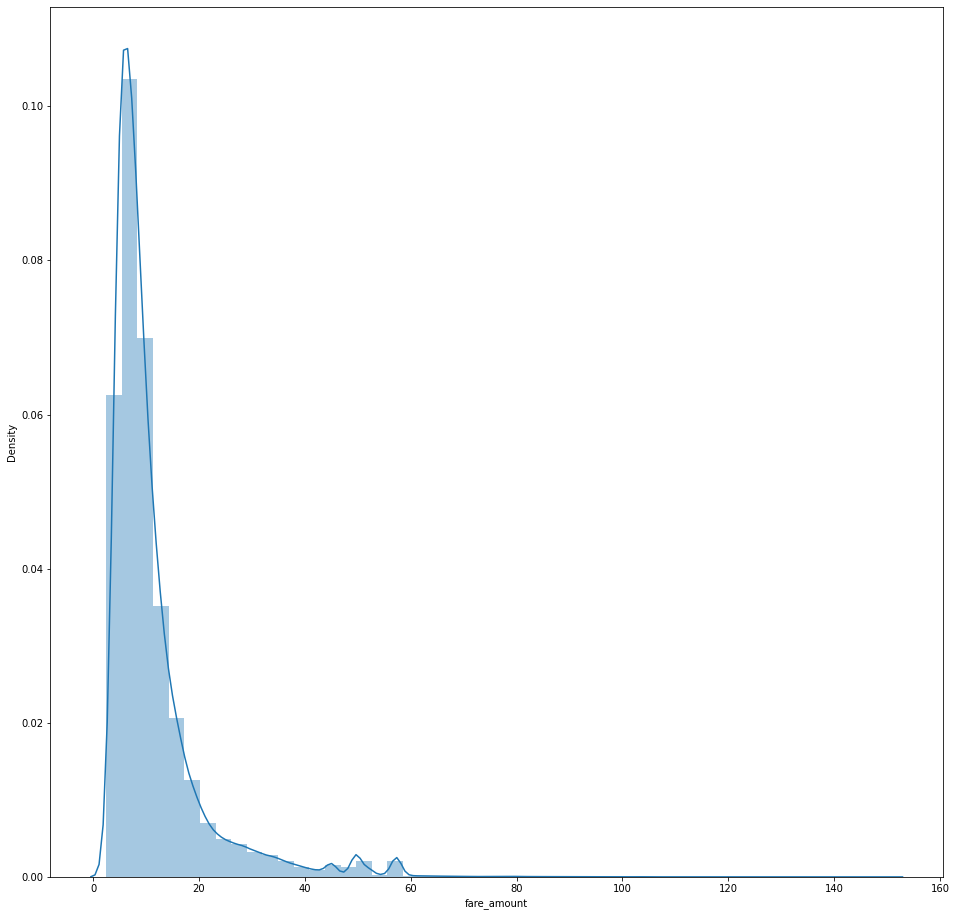

In [24]:
f, axes = plt.subplots(figsize = (16,16))
sns.distplot(df_new4['fare_amount'])

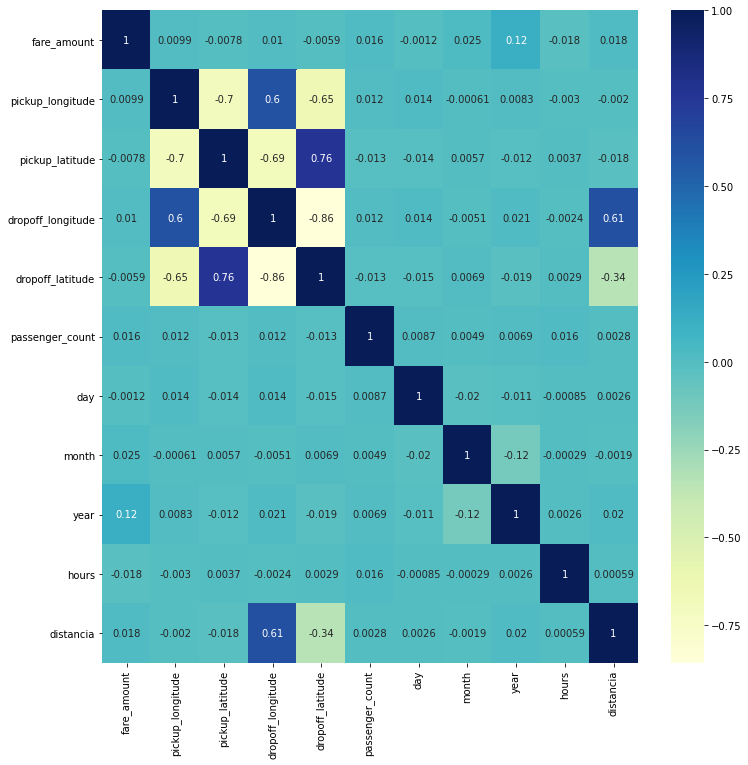

In [25]:
plt.figure(figsize=(12,12))

correlacion = df_new4.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

## 4. Modelamiento

In [44]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, average_precision_score, precision_recall_curve
 

X=df_new4[["distancia","passenger_count"]]
#"passenger_count"
y=df_new4[["fare_amount"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
    random_state=0)


X_train.shape, X_test.shape

clf = LinearRegression()
clf.fit(X_train, y_train)

score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)

#scores = cross_val_score(clf, X_train, y_train,scoring="accuracy")
#print("Metricas cross_validation", scores)


Metrica del modelo 0.0006195255863934435


## 5. Optimización y forecasting